In [102]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['class','id','sequence']
data = pd.read_csv(url, names = names)
print(data.shape)

(106, 3)


In [103]:
data.head(5)

,class,id,sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


In [104]:
classes = data.loc[:, 'class']
sequences = list(data.loc[:, 'sequence'])
dataset = {}

for i, seq in enumerate(sequences):
    nucleotides = list(seq)
    nucleotides = [x for x in nucleotides if x != '\t']
    nucleotides.append(classes[i])
    dataset[i] = nucleotides
    

In [105]:
df = pd.DataFrame(dataset)
df.shape

(58, 106)

In [106]:
df = df.transpose()

In [107]:
df = pd.get_dummies(df)

In [108]:
df = df.drop(['57_-'],axis = 1)

In [109]:
Y = df['57_+']
X = df.drop(['57_+'],axis = 1)

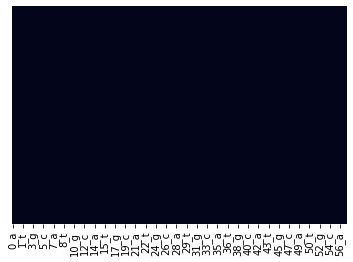

In [110]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 42)

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# define scoring method
scoring = 'accuracy'

# Define models to train
names = ["Nearest Neighbors", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "SVM Linear", "SVM RBF", "SVM Sigmoid"]

classifiers = [
    KNeighborsClassifier(n_neighbors = 3),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    SVC(kernel = 'linear'), 
    SVC(kernel = 'rbf'),
    SVC(kernel = 'sigmoid')
]

models = zip(names, classifiers)

# evaluate each model in turn
results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, x_train, y_train, cv=10)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name)
    print('accuracy',accuracy_score(y_test, predictions))
    print('report',classification_report(y_test, predictions))

Nearest Neighbors: 0.820000 (0.139553)
Nearest Neighbors
accuracy 0.7727272727272727
report               precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.71      0.91      0.80        11

    accuracy                           0.77        22
   macro avg       0.79      0.77      0.77        22
weighted avg       0.79      0.77      0.77        22

Gaussian Process: 0.905000 (0.086458)
Gaussian Process
accuracy 0.9090909090909091
report               precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.85      1.00      0.92        11

    accuracy                           0.91        22
   macro avg       0.92      0.91      0.91        22
weighted avg       0.92      0.91      0.91        22

Decision Tree: 0.857500 (0.119922)
Decision Tree
accuracy 0.9090909090909091
report               precision    recall  f1-score   support

           0       0.91  

/home/surya/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/surya/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/surya/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/surya/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/surya/miniconda3/lib/python3.7/site-pa

Random Forest: 0.795000 (0.113908)
Random Forest
accuracy 0.8636363636363636
report               precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.73      0.84        11

    accuracy                           0.86        22
   macro avg       0.89      0.86      0.86        22
weighted avg       0.89      0.86      0.86        22



/home/surya/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/surya/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/surya/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/surya/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

Neural Net: 0.917500 (0.090173)


/home/surya/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neural Net
accuracy 0.9090909090909091
report               precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.85      1.00      0.92        11

    accuracy                           0.91        22
   macro avg       0.92      0.91      0.91        22
weighted avg       0.92      0.91      0.91        22

AdaBoost: 0.847500 (0.115353)
AdaBoost
accuracy 0.9090909090909091
report               precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.85      1.00      0.92        11

    accuracy                           0.91        22
   macro avg       0.92      0.91      0.91        22
weighted avg       0.92      0.91      0.91        22

Naive Bayes: 0.852500 (0.156704)
Naive Bayes
accuracy 0.8181818181818182
report               precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.82      0.82    

/home/surya/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/surya/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/surya/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/surya/miniconda3/lib/python3.7/site-packages/skle